# Меня ждут миллионы

Обучите простую модель предсказания цены акций. Используйте один из рассмотренных на лекции "Временные последовательности" алгоритмов предсказания рядов. Можно использовать и более сложные алгоритмы предсказания рядов


1. Найдите данные о цене любого биржевого актива

    Данные должны содержать значение цены актива как минимум за каждый день и длительностю как минимум за год. 

    Найти данные можно на kaggle или использовать FAANG датасет из 1 лабораторной


2. Предобработайте данные

    Временной ряд сложно предсказывать по дням. Сделайте ряд по неделям или месяцам
   
    Удалите из ряда тренд, если он есть. Используйте другие рассмотренные на лекции приёмы


3. Обучите модель
    
    Обучите модель на 80% временного ряда
    
    Предскажите оставшиеся 20% (как минимум 3 точки) ряда с помощью модели 
    
    Отобразите на графике предсказание модели и истинные данные


4. Посчитайте метрику

    Метрика должна отражать разницу между предсказанными и истинными данными. Можно выбрать меру MAPE, можно предложить свою

In [84]:
import datetime
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm

from tqdm import tqdm
from dateutil.relativedelta import relativedelta

from sklearn.metrics import mean_absolute_percentage_error

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf

%matplotlib inline

In [2]:
df = pd.read_csv("coin_Bitcoin.csv").drop(['SNo', 'Name', 'Symbol'], axis=1)
df.head()

,Date,High,Low,Open,Close,Volume,Marketcap
0,2013-04-29 23:59:59,147.488007,134.000000,134.444000,144.539993,0.0,1.603769e+09
1,2013-04-30 23:59:59,146.929993,134.050003,144.000000,139.000000,0.0,1.542813e+09
2,2013-05-01 23:59:59,139.889999,107.720001,139.000000,116.989998,0.0,1.298955e+09
3,2013-05-02 23:59:59,125.599998,92.281898,116.379997,105.209999,0.0,1.168517e+09
4,2013-05-03 23:59:59,108.127998,79.099998,106.250000,97.750000,0.0,1.085995e+09


In [3]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')


df = df.set_index(['Date'])
df.sort_index(inplace=True)
df.head()

,High,Low,Open,Close,Volume,Marketcap
Date,,,,,,
2013-04-29 23:59:59,147.488007,134.000000,134.444000,144.539993,0.0,1.603769e+09
2013-04-30 23:59:59,146.929993,134.050003,144.000000,139.000000,0.0,1.542813e+09
2013-05-01 23:59:59,139.889999,107.720001,139.000000,116.989998,0.0,1.298955e+09
2013-05-02 23:59:59,125.599998,92.281898,116.379997,105.209999,0.0,1.168517e+09
2013-05-03 23:59:59,108.127998,79.099998,106.250000,97.750000,0.0,1.085995e+09


In [4]:
df = df.groupby(pd.Grouper(freq='M')).mean()
df.head()

,High,Low,Open,Close,Volume,Marketcap
Date,,,,,,
2013-04-30,147.209000,134.025002,139.222000,141.769997,0.0,1.573291e+09
2013-05-31,123.949096,114.253513,120.292097,119.992741,0.0,1.339718e+09
2013-06-30,111.300543,104.602963,108.856067,107.761407,0.0,1.216792e+09
2013-07-31,93.868936,86.719010,90.311422,90.512207,0.0,1.034233e+09
2013-08-31,116.002226,111.388452,113.041936,113.905484,0.0,1.317466e+09


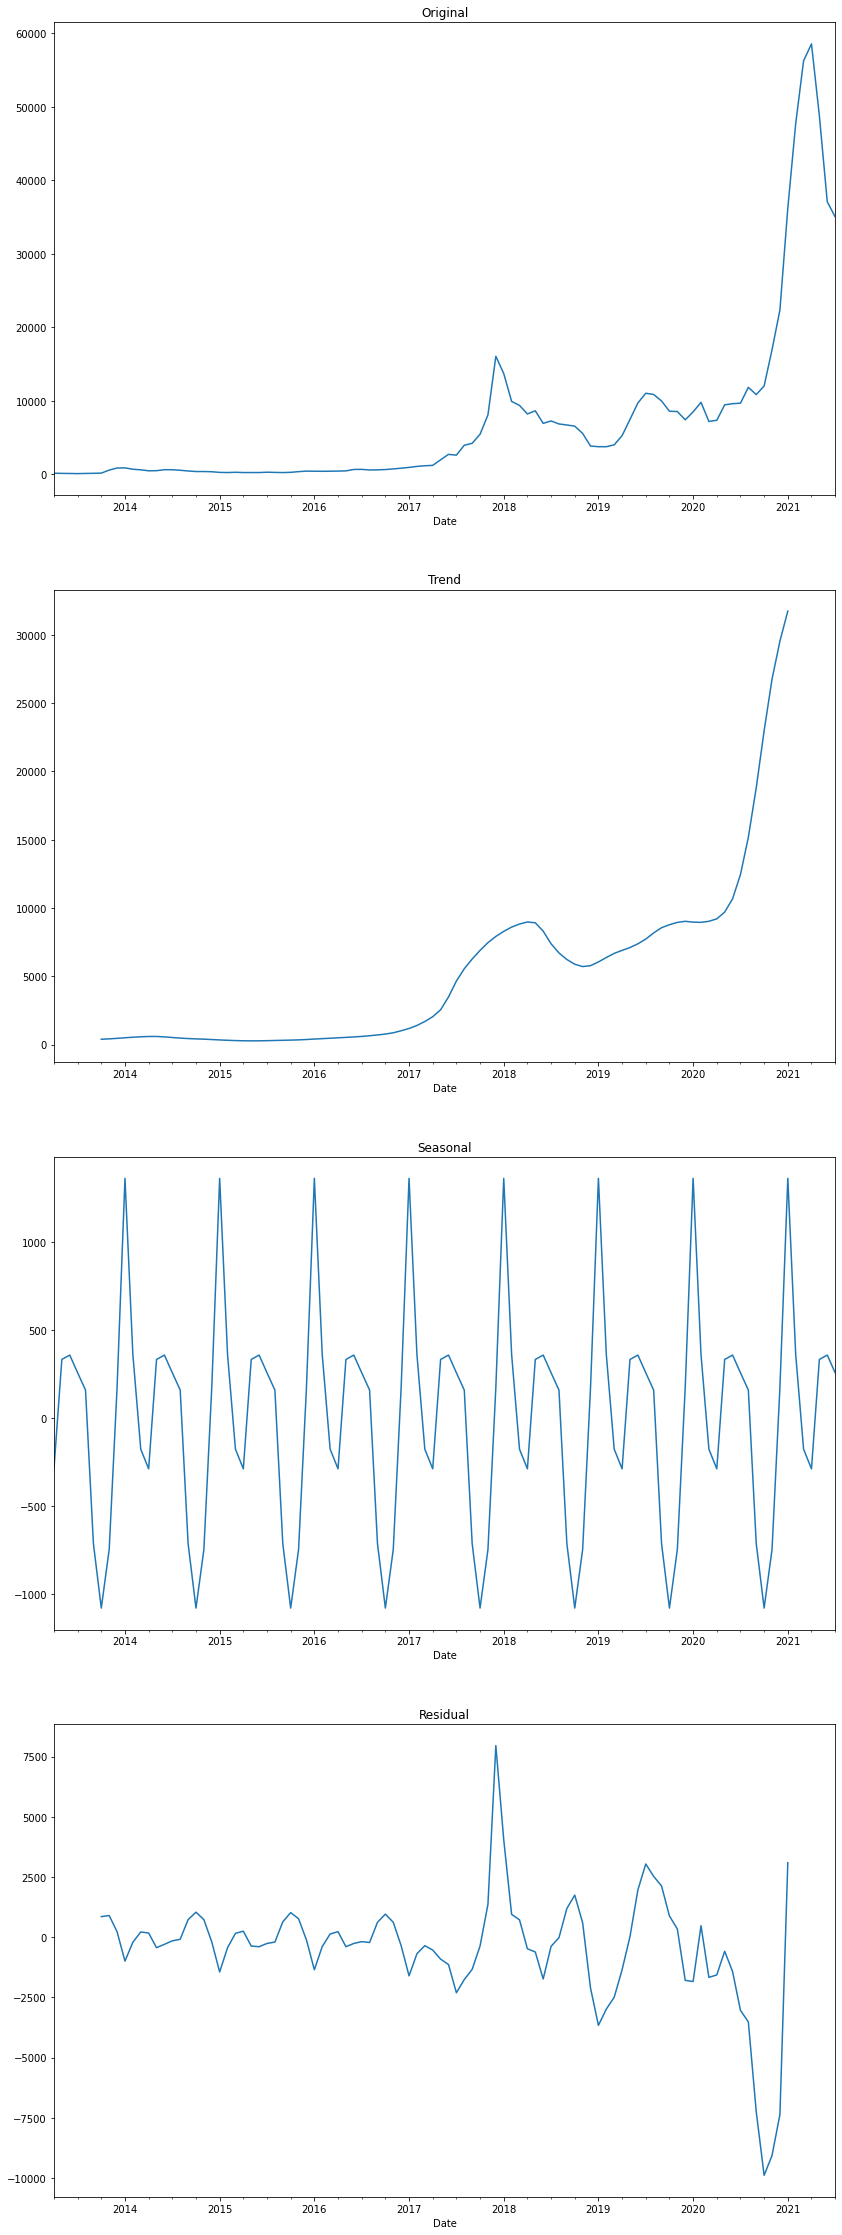

In [5]:
fig, ax = plt.subplots(nrows=4, ncols=1, figsize=(14, 40))
decompose = seasonal_decompose(df[['High']])

ax[0].set_title('Original')
ax[1].set_title('Trend')
ax[2].set_title('Seasonal')
ax[3].set_title('Residual')

decompose.observed.plot(ax=ax[0])
decompose.trend.plot(ax=ax[1])
decompose.seasonal.plot(ax=ax[2])
decompose.resid.plot(ax=ax[3]);

In [6]:
p_value = adfuller(df['High'])[1]

print(
    f'Полученный уровень значимости (p-value): {round(p_value, 4)}.',
    f'{round(p_value, 4)} > 0.05. Нулевая гипотеза не отвергается в пользу альтернативной!'
)

Полученный уровень значимости (p-value): 0.999. 0.999 > 0.05. Нулевая гипотеза не отвергается в пользу альтернативной!


In [7]:
df['HighSDiff'] = df['High'].diff(4) 

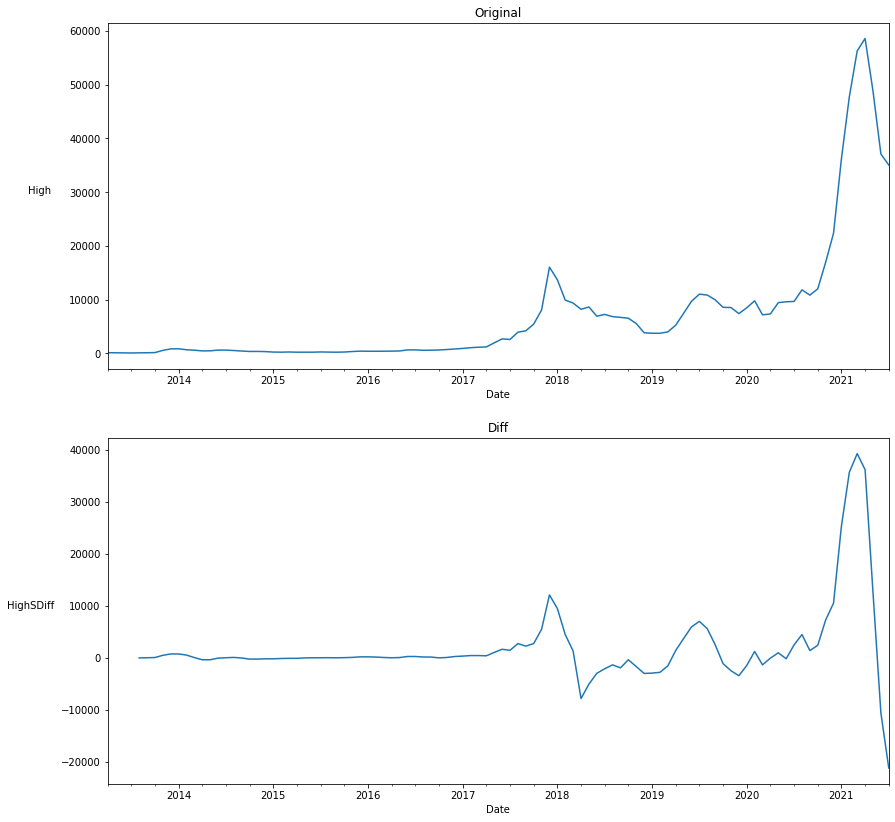

In [8]:
plt.subplots(nrows=2, ncols=1, figsize=(14, 14))

ax = plt.subplot(211)
ax.set_title('Original')
ax.set_ylabel('High', rotation=0, labelpad=30)
df['High'].plot(ax=ax)

ax = plt.subplot(212)
ax.set_title('Diff')
ax.set_ylabel('HighSDiff', rotation=0, labelpad=30)
df['HighSDiff'].plot(ax=ax)

In [9]:
p_value = adfuller(df['HighSDiff'][4:])[1]

print(
    f'Полученный уровень значимости (p-value): {round(p_value, 4)}.',
    f'{round(p_value, 4)} > 0.05. Ряд станционарен'
)

Полученный уровень значимости (p-value): 0.3382. 0.3382 > 0.05. Ряд станционарен


In [10]:
df['HighDiff'] = df['High'].diff(1) 

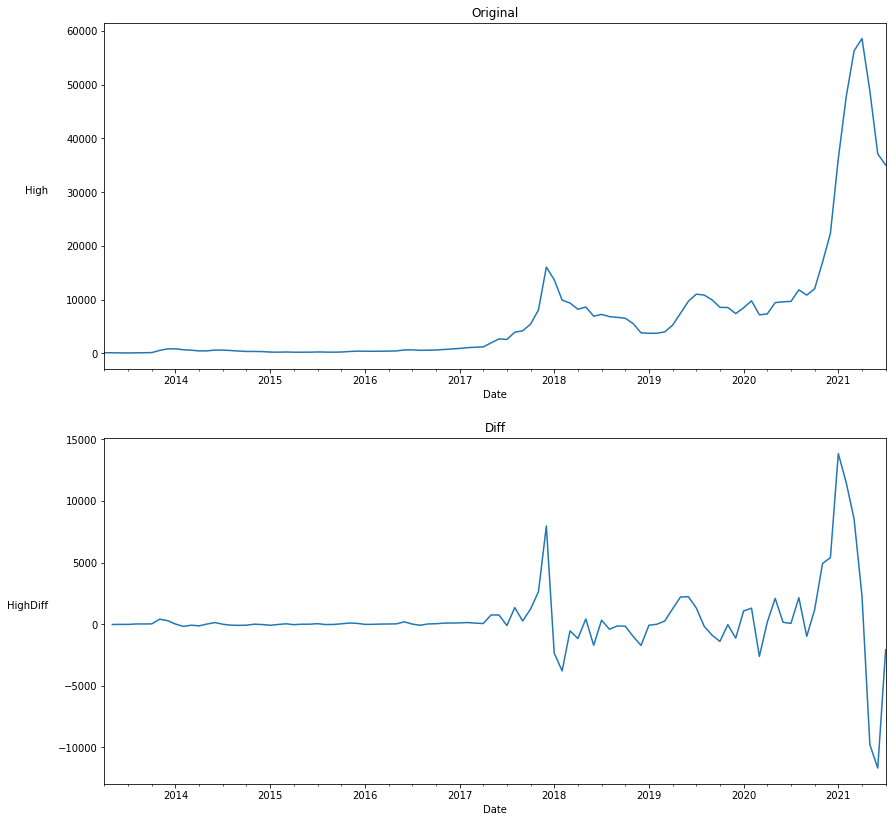

In [11]:
plt.subplots(nrows=2, ncols=1, figsize=(14, 14))

ax = plt.subplot(211)
ax.set_title('Original')
ax.set_ylabel('High', rotation=0, labelpad=30)
df['High'].plot(ax=ax)

ax = plt.subplot(212)
ax.set_title('Diff')
ax.set_ylabel('HighDiff', rotation=0, labelpad=30)
df['HighDiff'].plot(ax=ax)

In [12]:
p_value = adfuller(df['HighDiff'][1:])[1]

print(
    f'Полученный уровень значимости (p-value): {round(p_value, 4)}.',
    f'{round(p_value, 4)} < 0.05. Ряд станционарен'
)

Полученный уровень значимости (p-value): 0.0006. 0.0006 < 0.05. Ряд станционарен


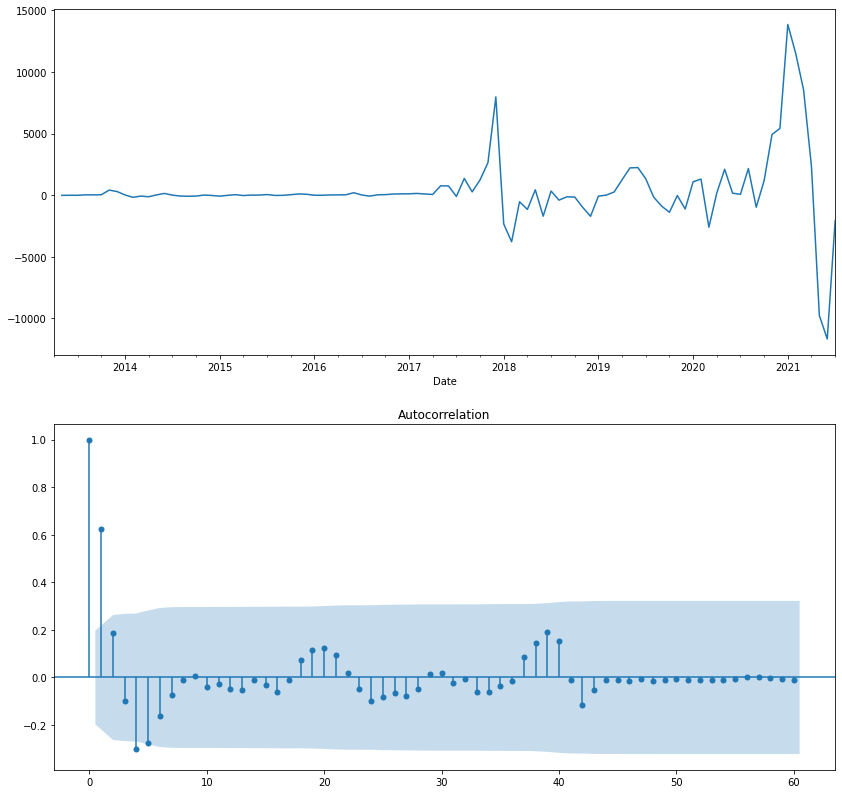

In [13]:
plt.figure(figsize=(14, 14))

ax = plt.subplot(211)
df['HighDiff'].plot(ax=ax)

ax = plt.subplot(212)
plot_acf(df['HighDiff'][1:], lags=60, ax=ax);

# Как можно видеть из графиков, среди 60 корреляций можно выделить только 2-3 значимый, при этом их значимость довольна мала
# Это может значить что ряд стационарет (опять-таки это скорее необходимое, но не достаточное требование к стационарности ряда)

In [14]:
df['HighLog'] = np.log(df['High'])

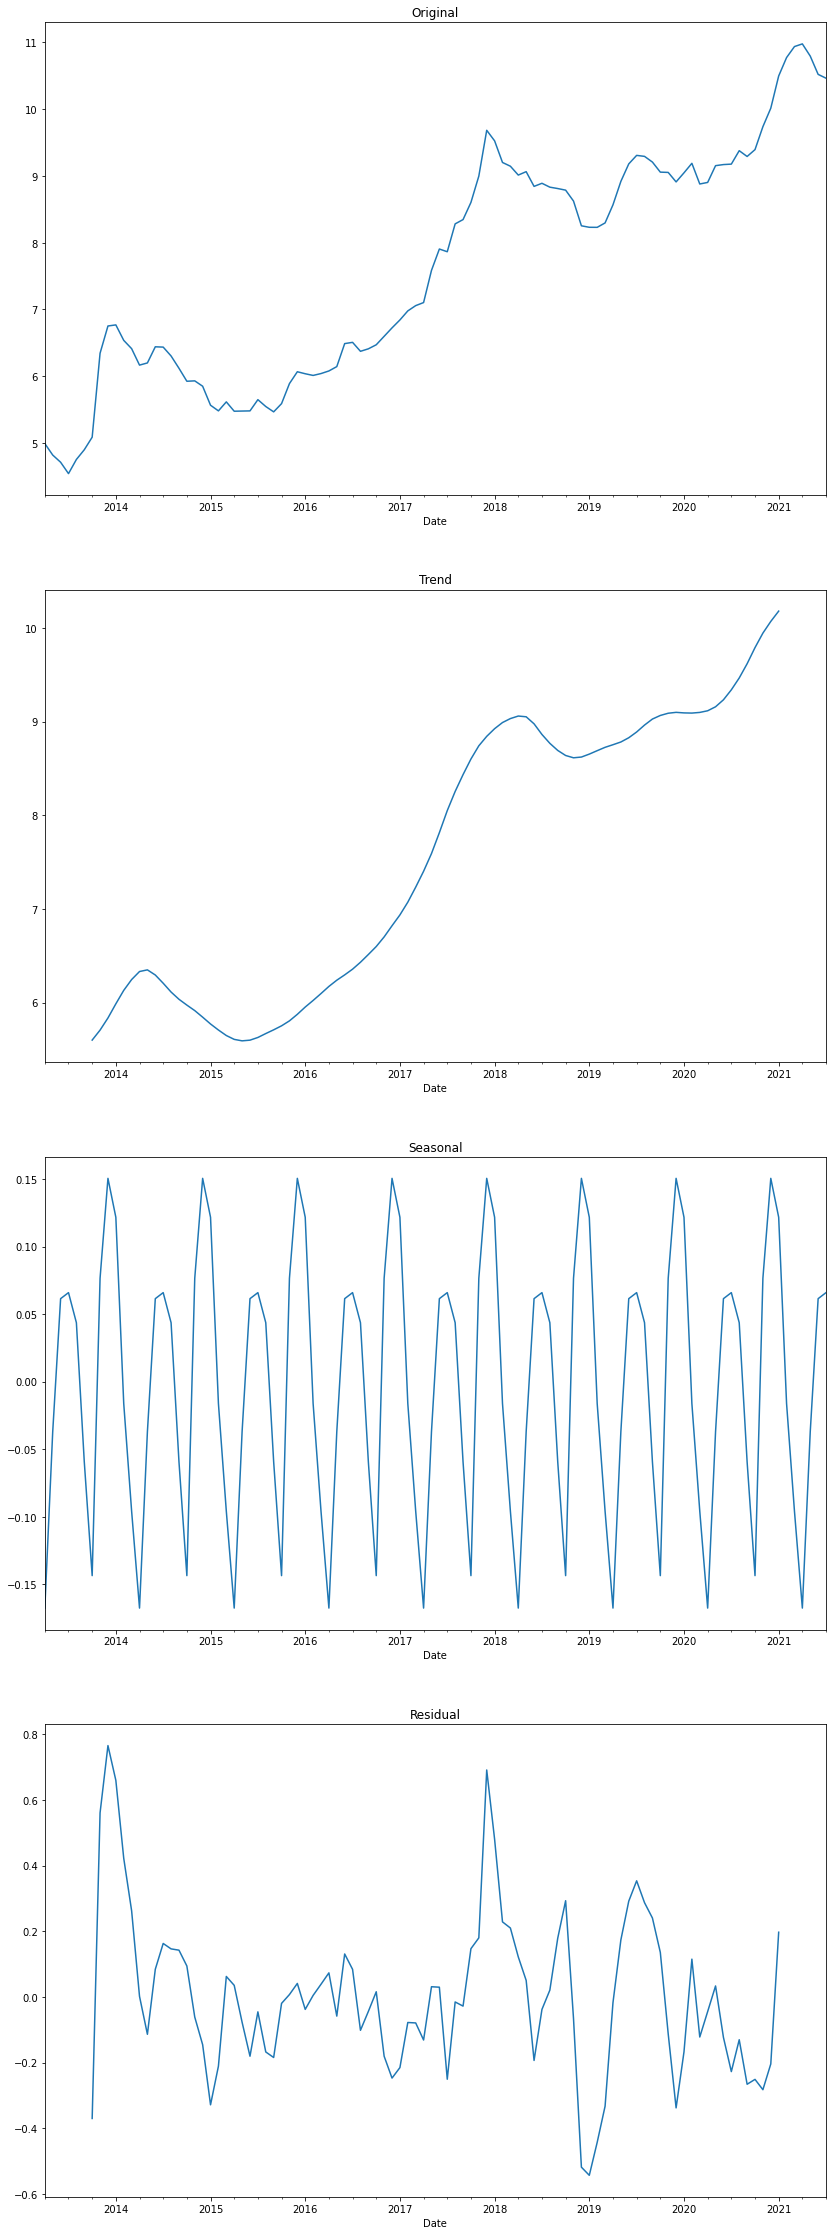

In [15]:
fig, ax = plt.subplots(nrows=4, ncols=1, figsize=(14, 40))
decompose = seasonal_decompose(df[['HighLog']])

ax[0].set_title('Original')
ax[1].set_title('Trend')
ax[2].set_title('Seasonal')
ax[3].set_title('Residual')

decompose.observed.plot(ax=ax[0])
decompose.trend.plot(ax=ax[1])
decompose.seasonal.plot(ax=ax[2])
decompose.resid.plot(ax=ax[3]);

In [16]:
p_value = adfuller(df['HighLog'][4:])[1]

print(
    f'Полученный уровень значимости (p-value): {round(p_value, 4)}.',
    f'{round(p_value, 4)} > 0.05. Ряд станционарен!'
)

Полученный уровень значимости (p-value): 0.7103. 0.7103 > 0.05. Ряд станционарен!


In [17]:
df['HighLogSDiff'] = df['HighLog'].diff(4)
df.head()

,High,Low,Open,Close,Volume,Marketcap,HighSDiff,HighDiff,HighLog,HighLogSDiff
Date,,,,,,,,,,
2013-04-30,147.209000,134.025002,139.222000,141.769997,0.0,1.573291e+09,NaN,NaN,4.991853,NaN
2013-05-31,123.949096,114.253513,120.292097,119.992741,0.0,1.339718e+09,NaN,-23.259903,4.819871,NaN
2013-06-30,111.300543,104.602963,108.856067,107.761407,0.0,1.216792e+09,NaN,-12.648554,4.712234,NaN
2013-07-31,93.868936,86.719010,90.311422,90.512207,0.0,1.034233e+09,NaN,-17.431607,4.541900,NaN
2013-08-31,116.002226,111.388452,113.041936,113.905484,0.0,1.317466e+09,-31.206774,22.133290,4.753609,-0.238244


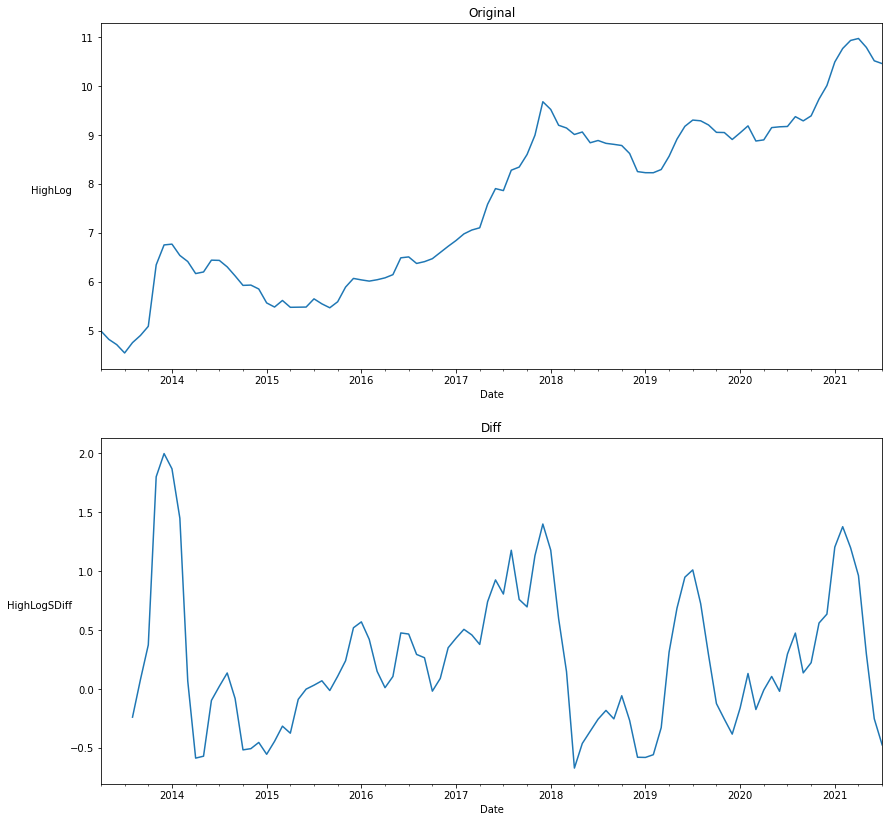

In [18]:
plt.subplots(nrows=2, ncols=1, figsize=(14, 14))

ax = plt.subplot(211)
ax.set_title('Original')
ax.set_ylabel('HighLog', rotation=0, labelpad=30)
df['HighLog'].plot(ax=ax);

ax = plt.subplot(212)
ax.set_title('Diff')
ax.set_ylabel('HighLogSDiff', rotation=0, labelpad=30)
df['HighLogSDiff'].plot(ax=ax);

In [19]:
p_value = adfuller(df['HighLogSDiff'][4:])[1]

print(
    f'Полученный уровень значимости (p-value): {round(p_value, 4)}.',
    f'{round(p_value, 4)} > 0.05. Ряд не станционарен'
)

Полученный уровень значимости (p-value): 0.0591. 0.0591 > 0.05. Ряд не станционарен


In [20]:
df['HighLogDiff'] = df['HighLog'].diff(1)
df.head()

,High,Low,Open,Close,Volume,Marketcap,HighSDiff,HighDiff,HighLog,HighLogSDiff,HighLogDiff
Date,,,,,,,,,,,
2013-04-30,147.209000,134.025002,139.222000,141.769997,0.0,1.573291e+09,NaN,NaN,4.991853,NaN,NaN
2013-05-31,123.949096,114.253513,120.292097,119.992741,0.0,1.339718e+09,NaN,-23.259903,4.819871,NaN,-0.171982
2013-06-30,111.300543,104.602963,108.856067,107.761407,0.0,1.216792e+09,NaN,-12.648554,4.712234,NaN,-0.107637
2013-07-31,93.868936,86.719010,90.311422,90.512207,0.0,1.034233e+09,NaN,-17.431607,4.541900,NaN,-0.170335
2013-08-31,116.002226,111.388452,113.041936,113.905484,0.0,1.317466e+09,-31.206774,22.133290,4.753609,-0.238244,0.211710


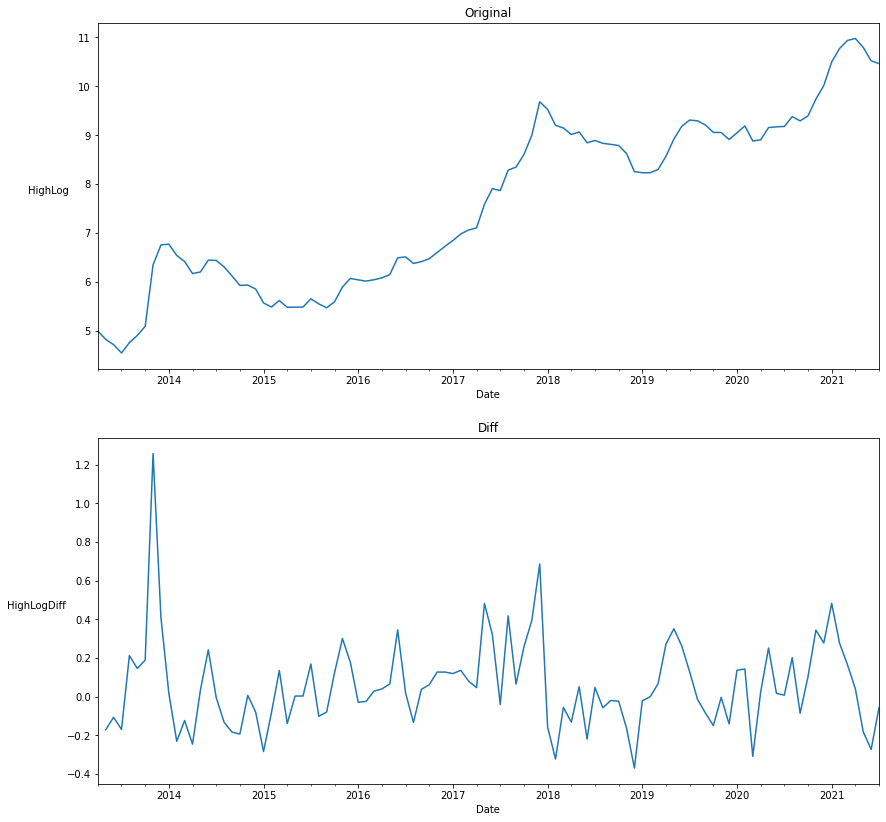

In [21]:
plt.subplots(nrows=2, ncols=1, figsize=(14, 14))

ax = plt.subplot(211)
ax.set_title('Original')
ax.set_ylabel('HighLog', rotation=0, labelpad=30)
df['HighLog'].plot(ax=ax);

ax = plt.subplot(212)
ax.set_title('Diff')
ax.set_ylabel('HighLogDiff', rotation=0, labelpad=30)
df['HighLogDiff'].plot(ax=ax);

In [22]:
p_value = adfuller(df['HighLogDiff'][1:])[1]

print(
    f'Полученный уровень значимости (p-value): {round(p_value, 4)}.',
    f'{round(p_value, 4)} < 0.05. Ряд станционарен'
)

Полученный уровень значимости (p-value): 0.0. 0.0 < 0.05. Ряд станционарен


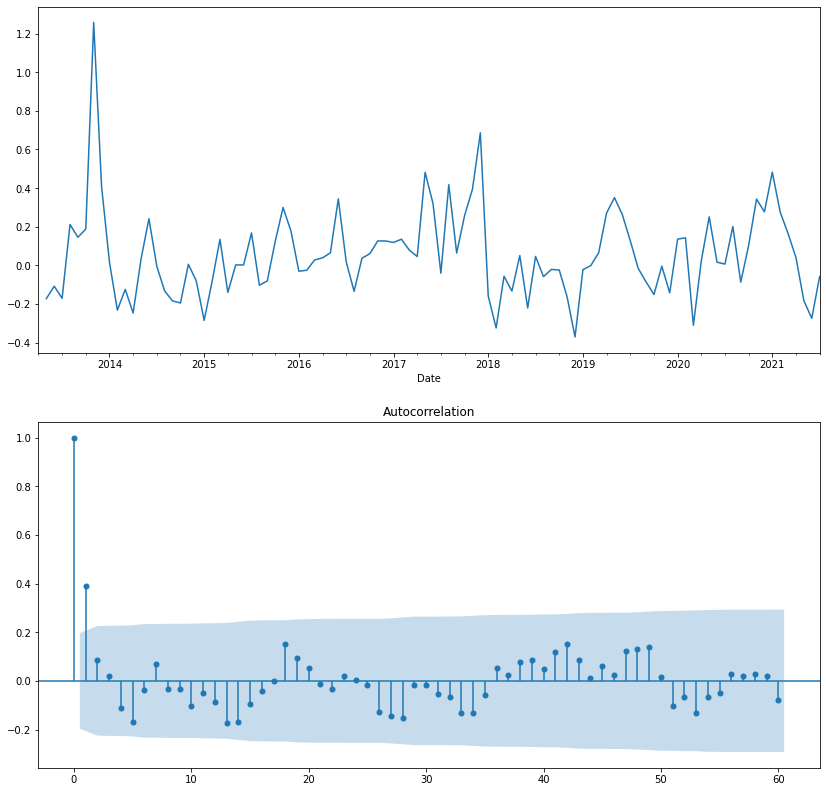

In [23]:
# Построим корелограмму и проверим наличие значимых коррелаций
plt.figure(figsize=(14, 14))

ax = plt.subplot(211)
df['HighLogDiff'].plot(ax=ax)

ax = plt.subplot(212)
plot_acf(df['HighLogDiff'][1:], lags=60, ax=ax);

# Как можно видеть из графиков, среди 60 корреляций можно выделить только 2-3 значимый, при этом их значимость довольна мала
# Это может значить что ряд стационарет (опять-таки это скорее необходимое, но не достаточное требование к стационарности ряда)

Станционарными в итоге оказались HighDiff и HighLogDiff ряды. Но второй чуть лучше показывает себя на кореллограмме

<h1>Prediction</h1>

In [157]:
d=1
D=range(0,2)

qs = range(1, 4)
Qs = range(1, 3)

ps = range(1, 4)
Ps = range(3, 5)


size = len(df.HighLog)
percentile = int(0.8 * size)

X_train = df['HighLog'][:percentile]
X_test = df['HighLog'][percentile:]
y_train = df['High'][:percentile]
y_test = df['High'][percentile:]

In [158]:
from itertools import product
parameters = product(ps, qs, Ps, D, Qs)
parameters_list = list(parameters)
len(parameters_list)

72

In [159]:
%%time
#warnings.filterwarnings('ignore')

results = []
best_aic = float("inf")

for param in tqdm(parameters_list):
    try:
        model = sm.tsa.statespace.SARIMAX(
            X_train, 
            order=(param[0], d, param[1]), 
            seasonal_order=(param[2], param[3], param[4], 6)
        ).fit(disp=-1)
    except ValueError:
        print('wrong parameters:', param)
        continue
    aic = model.aic
    if aic < best_aic:
        best_model = model
        best_aic = aic
        best_param = param
    results.append([param, model.aic])

#warnings.filterwarnings('default')

  0%|          | 0/72 [00:00<?, ?it/s]


In [144]:
result_table = pd.DataFrame(results)
result_table.columns = ['parameters', 'aic']
print(result_table.sort_values(by = 'aic', ascending=True).head())

         parameters       aic
1   (1, 1, 3, 0, 2) -8.986344
0   (1, 1, 3, 0, 1) -8.181796
41  (2, 3, 3, 0, 2) -7.318467
40  (2, 3, 3, 0, 1) -7.058543
5   (1, 1, 4, 0, 2) -7.048427


In [146]:
print(best_model.summary())

                                       SARIMAX Results                                        
Dep. Variable:                                HighLog   No. Observations:                   80
Model:             SARIMAX(1, 1, 1)x(3, 0, [1, 2], 6)   Log Likelihood                  12.493
Date:                                Tue, 26 Oct 2021   AIC                             -8.986
Time:                                        21:33:37   BIC                              9.969
Sample:                                    04-30-2013   HQIC                            -1.392
                                         - 11-30-2019                                         
Covariance Type:                                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2776      0.453      0.613      0.540      -0.610       1.165
ma.

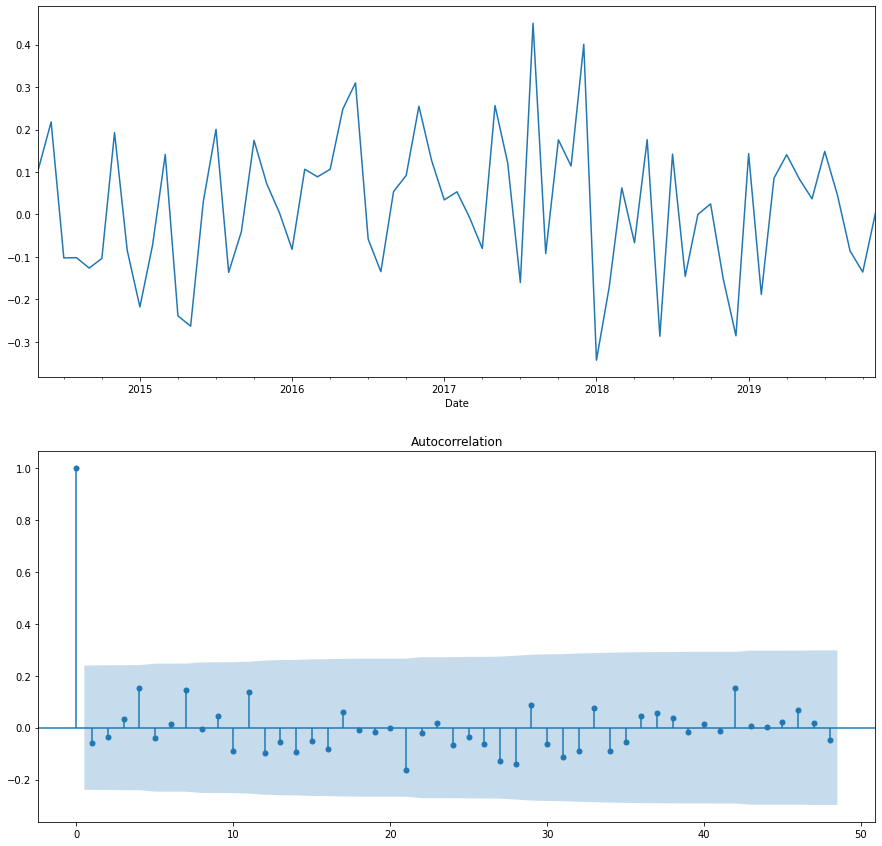

In [145]:
plt.figure(figsize=(15,15))

plt.subplot(211)
best_model.resid[13:].plot()

ax = plt.subplot(212)
sm.graphics.tsa.plot_acf(best_model.resid[13:].values.squeeze(), lags=48, ax=ax);

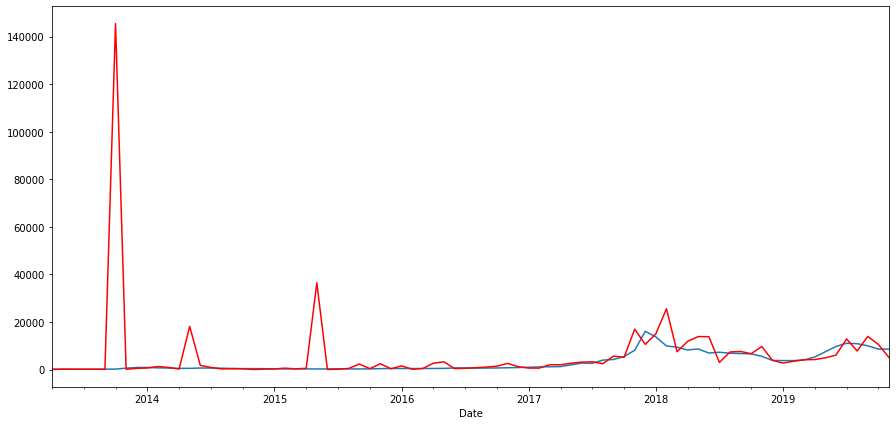

In [131]:
# y_train_pred = np.exp(best_model.fittedvalues)

# plt.figure(figsize=(15,7))

# y_train.plot()
# y_train_pred.plot(c='r');

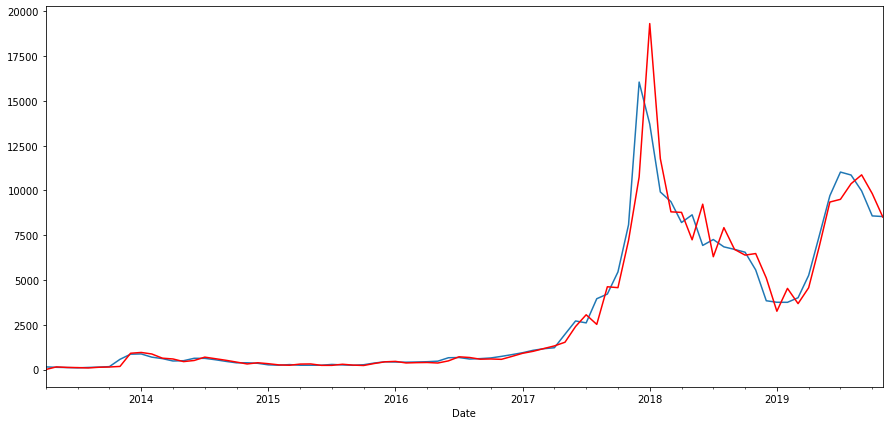

In [148]:
y_train_pred = np.exp(best_model.fittedvalues)

plt.figure(figsize=(15,7))

y_train.plot()
y_train_pred.plot(c='r');

In [151]:
predict_len = size - percentile

new_close_value = df[['High', 'Model']]
future_date = [
    datetime.datetime.strptime("2019-12", "%Y-%m") + relativedelta(months=x)
    for x in range(0, predict_len)
]

future_df = pd.DataFrame(index=future_date, columns=['Value', 'Model'])
new_close_value = pd.concat([new_close_value, future_df])

print(new_close_value.shape)
new_close_value.tail()

(120, 3)


,High,Model,Value
2021-03-01,NaN,NaN,NaN
2021-04-01,NaN,NaN,NaN
2021-05-01,NaN,NaN,NaN
2021-06-01,NaN,NaN,NaN
2021-07-01,NaN,NaN,NaN


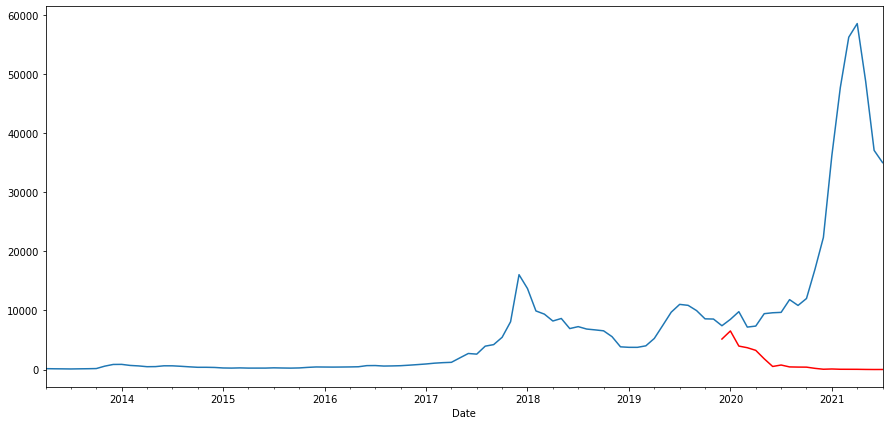

In [134]:
# y_pred = np.exp(best_model.predict(start=percentile, end=percentile + predict_len - 1))

# plt.figure(figsize=(15,7))
# df['High'].plot()
# y_pred.plot(c='r')

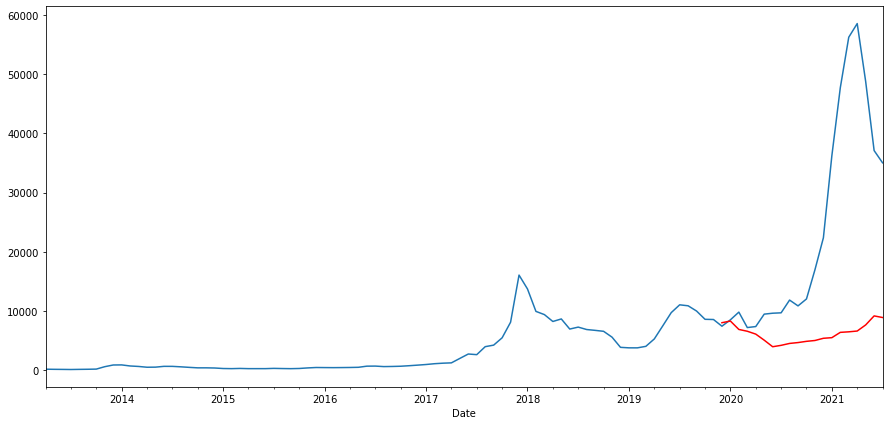

In [161]:
y_pred = np.exp(best_model.predict(start=percentile, end=percentile + predict_len - 1))

plt.figure(figsize=(15,7))
df['High'].plot()
y_pred.plot(c='r')

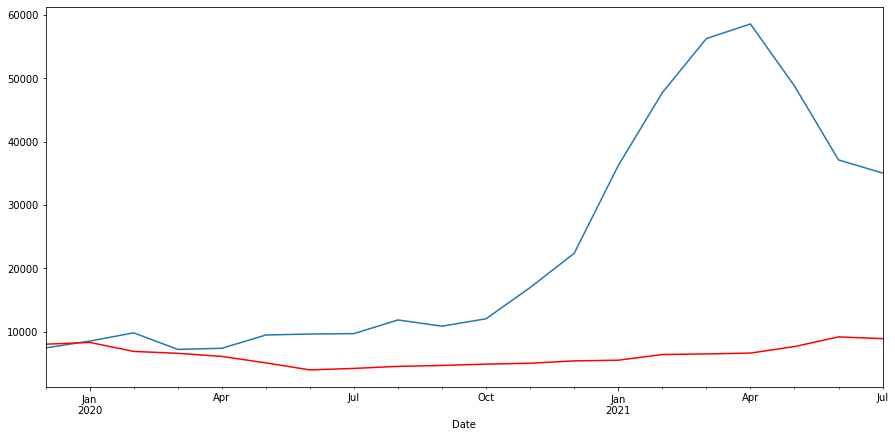

In [162]:
plt.figure(figsize=(15,7))
y_test.plot()
y_pred.plot(c='r')

In [136]:
# mean_absolute_percentage_error(y_pred, y_test)

1880.6694035829646

In [153]:
mean_absolute_percentage_error(y_pred, y_test)

2.6762763419314397